In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [51]:
!pip install sklearn 

In [52]:
df=pd.read_csv("https://raw.githubusercontent.com/gagan3012/online-shoppers-intention-/master/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [53]:
df['Administrative']=df['Administrative'].clip(lower=0,upper=20)
df['PageValues']=df['PageValues'].clip(lower=0,upper=250)
df['Administrative_Duration']=df['Administrative_Duration'].clip(lower=0,upper=1500)
df['Informational']=df['Informational'].clip(lower=0,upper=10)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].clip(lower=0,upper=20000)
df['ProductRelated']=df['ProductRelated'].clip(lower=0,upper=400)
df['Informational_Duration']=df['Informational_Duration'].clip(lower=0,upper=1500)

In [54]:
cat_dtype = pd.api.types.CategoricalDtype(categories=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],
                                          ordered=True)#ordered dtype for month
df['Month']=df['Month'].astype(cat_dtype)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.313901,79.909572,0.500568,33.929274,31.630318,1187.694533,0.022152,0.043003,5.863980,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.299558,165.983561,1.235324,133.387972,43.102423,1769.998361,0.048427,0.048527,18.173049,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,20.000000,1500.000000,10.000000,1500.000000,400.000000,20000.000000,0.200000,0.200000,250.000000,1.000000,8.000000,13.000000,9.000000,20.000000


In [55]:
cat_cols=['Weekend','VisitorType','Region','Browser','OperatingSystems','TrafficType']
df[cat_cols]=df[cat_cols].astype('category')
df =df.dropna()

In [56]:
df_encoded=pd.get_dummies(df,columns=cat_cols+['Month'],prefix=cat_cols+['Month'])


In [57]:
numeric_cols = df.select_dtypes(include='float64').columns


In [58]:
scaler = MinMaxScaler()
pt=PowerTransformer()
df_transformed = df_encoded.copy()
df_scaled = df_encoded.copy()
df_scaled[numeric_cols]= scaler.fit_transform(df_encoded[numeric_cols])
df_transformed[numeric_cols]= pt.fit_transform(df_encoded[numeric_cols])

In [59]:
df_scaled.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Mar,Month_May,Month_June,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,0.0,0.0,0.0,0.0,0.0025,0.000000,1.00,1.00,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0050,0.003200,0.00,0.50,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0025,0.000000,1.00,1.00,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0050,0.000133,0.25,0.70,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0250,0.031375,0.10,0.25,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
df_transformed.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Mar,Month_May,Month_June,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,-0.991065,-0.997544,-0.52074,-0.491916,-1.923024,-2.094361,2.207184,1.983626,-0.529787,-0.336232,...,1,0,0,0,0,0,0,0,0,0
1,-0.991065,-0.997544,-0.52074,-0.491916,-1.576413,-1.078325,-0.799476,1.571869,-0.529787,-0.336232,...,1,0,0,0,0,0,0,0,0,0
2,-0.991065,-0.997544,-0.52074,-0.491916,-1.923024,-2.094361,2.207184,1.983626,-0.529787,-0.336232,...,1,0,0,0,0,0,0,0,0,0
3,-0.991065,-0.997544,-0.52074,-0.491916,-1.576413,-1.875374,1.711008,1.833617,-0.529787,-0.336232,...,1,0,0,0,0,0,0,0,0,0
4,-0.991065,-0.997544,-0.52074,-0.491916,-0.445603,0.054466,0.758331,0.724766,-0.529787,-0.336232,...,1,0,0,0,0,0,0,0,0,0


In [61]:
df_encoded.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Mar,Month_May,Month_June,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [62]:
!pip install lightgbm 


In [63]:
!pip install hyperopt


In [64]:
import lightgbm as lgb #light gradient boosted tree
from sklearn.model_selection import train_test_split, StratifiedKFold # train and test split
from sklearn.metrics import balanced_accuracy_score,precision_score# metrics
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK# optimization
import numpy as np
import pandas as pd # reading data

In [65]:
label = df_encoded.pop('Revenue').astype('int')
_,_ = df_scaled.pop('Revenue'),df_transformed.pop('Revenue')

In [66]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
#Hyperparameter search space for gradient boosed trees
lgb_space = {'lr':hp.loguniform('lr',-6.9,-2.3),'num_leaves':hp.quniform('num_leaves',15,255,1),
         'max_depth':hp.choice('max_depth',[-1,9,12]),'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0)}

In [67]:
def lgb_optimizer(params):
    '''A function to optimize  lgb classifier
    :params:=params , dictionary containing the Hyper-parameters for the classifier
    returns true loss and validation loss
    '''
    if 'num_leaves' in params:
        params['num_leaves']=int(params['num_leaves'])
    if 'max_depth' in params:
        params['max_depth']=int(params['max_depth'])
    val_score=[]
    true_scores=[]
    rd=1
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = lgb.LGBMClassifier(n_estimators=2000,**params)
        clf.fit(X_tr,y_tr,eval_set=(X_val,y_val),early_stopping_rounds =200,eval_metric='logloss',verbose=False)
        y_pred = clf.predict(X_val)
        y_tr_pred=clf.predict(X_tr)
        score=balanced_accuracy_score(y_val,y_pred,)
        true_score=balanced_accuracy_score(y_tr,y_tr_pred)
        val_score.append(score)
        true_scores.append(true_score)
        rd+=1
    mean,std =np.mean(val_score),np.std(val_score)
    true_mean=np.mean(true_scores)
    print("mean: {}, Std: {}".format(mean,std))
    return {'loss':-mean,'status': STATUS_OK,'true_loss':-true_mean}

In [68]:
X_train,X_test,y_train,y_test = train_test_split(df_encoded,label,test_size=0.2,random_state=42)
trials_encoded = Trials()
best_e= fmin(lgb_optimizer,lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_encoded)

mean: 0.7832786055538408, Std: 0.006635218982768331   
mean: 0.7787116894088125, Std: 0.013328259968698191                              
mean: 0.7634860466656586, Std: 0.022002299597657333                              
mean: 0.7630888474549584, Std: 0.008497767115482054                              
mean: 0.7605896753698749, Std: 0.009884572553159963                              
mean: 0.7691326263460647, Std: 0.014661217636079669                              
mean: 0.7441970412507827, Std: 0.010129264790380947                              
mean: 0.7758283148151157, Std: 0.01377501930741764                               
mean: 0.7520439001103469, Std: 0.01705256367908015                               
mean: 0.7563748948704266, Std: 0.006531380421865752                              
mean: 0.7552266924767841, Std: 0.018151481722594363                               
mean: 0.7714630912405978, Std: 0.015719497000234107                               
mean: 0.784030764693459, Std: 0.014201187

In [89]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,label,test_size=0.2,random_state=42)
trials_scaled = Trials()
best_scaled = fmin(lgb_optimizer, lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_scaled)

mean: 0.761790226979904, Std: 0.01080934937138968     
mean: 0.7551430012134419, Std: 0.005269347438222103                             
mean: 0.7613237141075453, Std: 0.016933387747844773                             
mean: 0.7716987501921387, Std: 0.015190139757868247                             
mean: 0.7802517861092748, Std: 0.010952287087257881                              
mean: 0.765663662845553, Std: 0.01921954605955464                                
mean: 0.7761617552046168, Std: 0.018955709752482938                              
mean: 0.776466846537691, Std: 0.01093042222651275                                
mean: 0.7630025568511989, Std: 0.009377739699927183                              
mean: 0.7709794952030922, Std: 0.010095783477428073                              
mean: 0.7606930741324389, Std: 0.01300533800165982                                
mean: 0.754274877749771, Std: 0.008671925518756562                                
mean: 0.7670719992301953, Std: 0.00722416157

In [90]:
X_train,X_test,y_train,y_test = train_test_split(df_transformed,label,test_size=0.2,random_state=42)
trials_transformed = Trials()
best_transformed = fmin(lgb_optimizer, lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_transformed)

mean: 0.7734321353456559, Std: 0.021334986727729495   
mean: 0.7560832876157675, Std: 0.0193905679415751                                
mean: 0.7544111806629068, Std: 0.011777526707365643                              
mean: 0.7668657515655403, Std: 0.01632200218271801                               
mean: 0.778170964117855, Std: 0.01434461339281364                                
mean: 0.7710535889018162, Std: 0.005633494279162656                              
mean: 0.7708876497588737, Std: 0.016003167303926265                             
mean: 0.7658838944617803, Std: 0.01014905391762528                              
mean: 0.7757714105045845, Std: 0.016995571051832296                             
mean: 0.7697577114807118, Std: 0.0210280458917572                               
mean: 0.7566495376798137, Std: 0.006334519429524895                              
mean: 0.7591547894721714, Std: 0.015354448970470313                              
mean: 0.7529178408478849, Std: 0.01335550835211

In [91]:
def model_trainer(Data,label,params,classifier='lgb',test_size=0.2):
    '''A function to train a model. 
    parameters:
    Data :=pandas dataset or numpy array of features
    label:=pandas dataset or numpy array of labels for features 
    params:=python dict parametes for the model
    model:=keras model object or sklearn classifier object
    test_size:=Float (0,1) fraction for test split
    return
    model:=str 'keras','lgb'
    train_score:=float balanced accuracy train score
    test_score:=float balanced accuracy test score
    returns-trained model,train_score,test_score
    '''
    X_train,X_test,y_train,y_test = train_test_split(Data,label,test_size=test_size,random_state=42)
    if classifier=='lgb':
        if 'num_leaves' in params:
            params['num_leaves']=int(params['num_leaves'])
        if 'max_depth' in params:
            #max_depth=[-1,9,12]#max_depth choice list
            params['max_depth']=-1#int(params['max_depth'])#best returns an index corresponding the choice
        clf = lgb.LGBMClassifier(n_estimators=5000,**params)
        clf.fit(X_train,y_train,eval_set=(X_test,y_test),early_stopping_rounds =200,eval_metric='auc',verbose=False)
        train_pred=clf.predict(X_train)
        test_pred=clf.predict(X_test)
    elif classifier=='keras':
        opt=['adam','sgd']
        if 'optimizer' in params:
            params['optimizer'] =opt[params['optimizer']]
        clf = model(feature_size=X_train.shape[-1],**params)
        clf.fit(X_train,y_train,epochs=20,batch_size=128,verbose=0)
        train_pred=np.round(clf.predict(X_train))
        test_pred=np.round(clf.predict(X_test))
    train_score = balanced_accuracy_score(train_pred,y_train)
    test_score= balanced_accuracy_score(test_pred,y_test)
    return clf,train_score,test_score

In [92]:
clf_encoded,lgb_train_encoded,lgb_test_encoded=model_trainer(df_encoded,label,best_e)
clf_scaled,lgb_train_scaled,lgb_test_scaled=model_trainer(df_scaled,label,best_scaled)
clf_transformed,lgb_train_transformed,lgb_test_transformed=model_trainer(df_transformed,label,best_transformed)

In [93]:
print(best_e)
print(best_scaled)
print(best_transformed)

{'colsample_bytree': 0.494182777812715, 'lr': 0.025354245824180614, 'max_depth': -1, 'num_leaves': 20}
{'colsample_bytree': 0.9580472004485319, 'lr': 0.0038100829735529204, 'max_depth': -1, 'num_leaves': 129}
{'colsample_bytree': 0.9440445139038744, 'lr': 0.004438421545291667, 'max_depth': -1, 'num_leaves': 24}


In [94]:
print("| Dataset Type | Train Score | Test Score |")
print("| Encoded      | {:2f}       | {:2f}     |".format(lgb_train_encoded,lgb_test_encoded))
print("| Scaled       | {:2f}       | {:2f}     |".format(lgb_train_scaled,lgb_test_scaled))
print("| Transformed  | {:2f}       | {:2f}     |".format(lgb_train_scaled,lgb_test_scaled))

| Dataset Type | Train Score | Test Score |
| Encoded      | 0.891863       | 0.811791     |
| Scaled       | 0.945524       | 0.819081     |
| Transformed  | 0.945524       | 0.819081     |


In [95]:
!pip install keras

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

In [97]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [98]:
def model(feature_size,lr=0.1,optimizer='adam',hl_size=128):
    ''' function to define keras model
    :feature:=
    '''
    if optimizer=='adam':
        opt =Adam(lr=lr)
    elif optimizer=='sgd':
        opt = SGD(lr=lr)
    hl_size=int(hl_size)
    model =Sequential()
    model.add(Dense(hl_size,activation='relu',input_shape=(feature_size,)))
    model.add(Dropout(0.25))
    model.add(Dense(hl_size,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    return model

In [99]:
def keras_optimizer(params):
    val_score=[]
    true_scores=[]
    rd=1
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        nn_model = model(X_train.shape[1],**params)
        cb = EarlyStopping(monitor='val_acc',min_delta=0.001,patience=3)
        nn_model.fit(X_tr,y_tr,validation_data=(X_val,y_val),batch_size=128,callbacks=[cb],epochs=50,verbose=0)
        #_,score= nn_model.evaluate(X_val,y_val)
        #_,true_score=nn_model.evaluate(X_tr,y_tr)
        cv_pred = np.round(nn_model.predict(X_val))
        score=balanced_accuracy_score(y_val,cv_pred)
        y_tr_pred = np.round(nn_model.predict(X_tr))
        true_score=balanced_accuracy_score(y_tr,y_tr_pred)
        
        val_score.append(score)
        true_scores.append(true_score)
        rd+=1
    mean,std =np.mean(val_score),np.std(val_score)
    true_mean=np.mean(true_scores)
    print("mean: {}, Std: {}".format(mean,std))
    return {'loss':-mean,'status': STATUS_OK,'true_loss':-true_mean}

In [100]:
keras_space = {'lr':hp.loguniform('lr',-10,-2.3),'optimizer':hp.choice('optimizer',['adam','sgd'])}


In [102]:
X_train,X_test,y_train,y_test = train_test_split(df_encoded,label,test_size=0.2,random_state=42)
best_nn_encoded=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.6759234906642438, Std: 0.04417803938928042    
mean: 0.5009667046986828, Std: 0.0012898055262315531                             
mean: 0.582733575105317, Std: 0.03498339174509645                                
mean: 0.6832142656300964, Std: 0.08622077711161849                               
mean: 0.6756577143549825, Std: 0.04991243680103733                               
mean: 0.6962872233670707, Std: 0.055864763394358405                              
mean: 0.6717543735777046, Std: 0.08527326697371458                               
mean: 0.669518978309254, Std: 0.08448745227222183                                
mean: 0.6739575957600759, Std: 0.05111015873336811                               
mean: 0.636138098707453, Std: 0.043976358607329645                               
100%|██████████| 10/10 [01:58<00:00, 11.87s/trial, best loss: -0.6962872233670707]


In [103]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,label,test_size=0.2,random_state=42)
best_nn_scaled=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.5, Std: 0.0                                   
mean: 0.5, Std: 0.0                                               
mean: 0.5, Std: 0.0                                               
mean: 0.5000641274776525, Std: 0.0015596933843605861              
mean: 0.5, Std: 0.0                                                              
mean: 0.7395557814704519, Std: 0.02445261520948237                               
mean: 0.5, Std: 0.0                                                              
mean: 0.5, Std: 0.0                                                              
mean: 0.4998192771084337, Std: 0.00014755962305921855                            
mean: 0.4999397590361446, Std: 0.000120481927710836                              
100%|██████████| 10/10 [02:06<00:00, 12.69s/trial, best loss: -0.7395557814704519]


In [104]:
X_train,X_test,y_train,y_test = train_test_split(df_transformed,label,test_size=0.2,random_state=42)
best_nn_transformed=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.5057837761168104, Std: 0.008774693441215706   
mean: 0.7599124222228608, Std: 0.033478053193990824                              
mean: 0.5011888795718086, Std: 0.002919778600141748                              
mean: 0.6980656033531492, Std: 0.02334427711588847                               
mean: 0.7883181142785018, Std: 0.008001332947030282                              
mean: 0.5585259115499442, Std: 0.05849554716542823                               
mean: 0.7559931354918689, Std: 0.021129406027587182                              
mean: 0.5183938325649866, Std: 0.036592010359754436                              
mean: 0.5127570503984613, Std: 0.02093598633808871                               
mean: 0.7821674437611456, Std: 0.021559878845071843                              
100%|██████████| 10/10 [03:10<00:00, 19.10s/trial, best loss: -0.7883181142785018]


In [105]:
print(best_nn_encoded)
print(best_nn_scaled)
print(best_nn_transformed)

{'lr': 0.00024298446901382443, 'optimizer': 0}
{'lr': 0.005019266489300136, 'optimizer': 0}
{'lr': 0.00038795094688760204, 'optimizer': 0}


In [106]:
_,nn_train_encoded,nn_test_encoded=model_trainer(df_encoded,label,best_nn_encoded,'keras')
_,nn_train_scaled,nn_test_scaled=model_trainer(df_scaled,label,best_nn_scaled,'keras')
_,nn_train_transformed,nn_test_transformed=model_trainer(df_transformed,label,best_nn_transformed,'keras')

In [107]:
print("|              |        neural network            |       Boosted Trees       |")
print("| Dataset Type | Train Score     | Test Score     |Train Score   | Test Score |")
print("| Encoded      | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_encoded,nn_test_encoded,lgb_train_encoded,lgb_test_encoded))
print("| Scaled       | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_scaled,nn_test_scaled,lgb_train_scaled,lgb_test_scaled))
print("| Transformed  | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_scaled,nn_test_scaled,lgb_train_scaled,lgb_test_scaled))

|              |        neural network            |       Boosted Trees       |
| Dataset Type | Train Score     | Test Score     |Train Score   | Test Score |
| Encoded      | 0.7531          | 0.7172         | 0.8919       | 0.8118     |
| Scaled       | 0.8956          | 0.7804         | 0.9455       | 0.8191     |
| Transformed  | 0.8956          | 0.7804         | 0.9455       | 0.8191     |


In [108]:
from sklearn.externals import joblib
joblib.dump(clf_encoded, 'lgb_best.pkl')

['lgb_best.pkl']

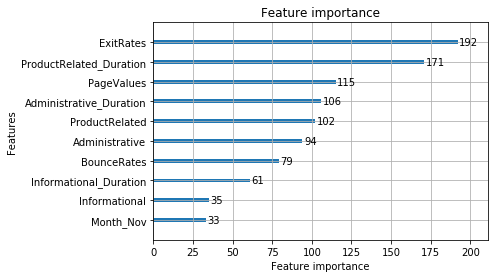

In [109]:
%matplotlib inline
lgb.plot_importance(clf_encoded,max_num_features=10)